# Profitability
A venture is considered profitable if it delivers economic benefit. Economic benefit is profit after accounting for opportunity costs. Suppose a company's accounting profit is $P_A$, then if $P_A - EC_A > 0$, then the venture delivers economic benefit or alpha. But what is $EC_A$? It is nothing but the accounting profit $P_B$ that can be achieved with the same investment $C$. The maths for a good company then looks like this:

$$
\begin{align*}
P_A - P_B &> 0 \\
\dfrac{P_A - P_B}{C} &> 0 \\
\dfrac{P_A}{C} > \dfrac{P_B}{C}
\end{align*}
$$

We are equivalently saying that the return $r_A = \dfrac{P_A}{C}$ should be greater than the return $r_B = \dfrac{P_B}{C}$. In DCF valuation, we value a company A by discounting cashflows opportunity cost. Suppose A doesn't reinvest and hence its free cash flow is the same as profit (and growth is zero. So it is essentially the same as sticking capital into an imaginary bank account that compounds at the rate of $r_A$)

$$
\begin{align*}
V_A &= \dfrac{P_A}{(1+r_B)} + \dfrac{P_A}{(1+r_B)^2}+ \ldots + \dfrac{P_A}{(1+r_B)^\infty} \\
V_A &= \dfrac{P_A}{r_B} \\
\dfrac{P_A}{V_A} &= r_B
\end{align*}
$$

We would buy the stock if $\dfrac{P_A}{V_A} > r_B$. This is just what we derived earlier, except with $V_A$ taking the place of the invested capital $C$. 


# Rates
When you see that a quantity - a height of a tree, the size of an animal's population etc. - has changed compared to it some time back, you can describe the rate of growth in many ways, each depending on your assumption of what happened in the time in between the first time you noted the figure and the time you noted it again. For example, if you had recorded the height of a tree to be 1 m 4 years ago and it has now grown to 11 m, you have to make an assumption about how the tree grew. You can assume that the growth was linear, implying that the tree grow 2.5 m/year. Or, you could assume that the tree grew 82.11% every year, in which case the growth is exponential. Or, you could assume it grew in some other way. In a way, you are trying to come up with a method by which you can tell what the tree's height would have been at any point in time in between the observation instances. Let us see how the tree's assumed growth looks like based on different assumptions.

Text(0.5, 0.98, 'Rates of growth')

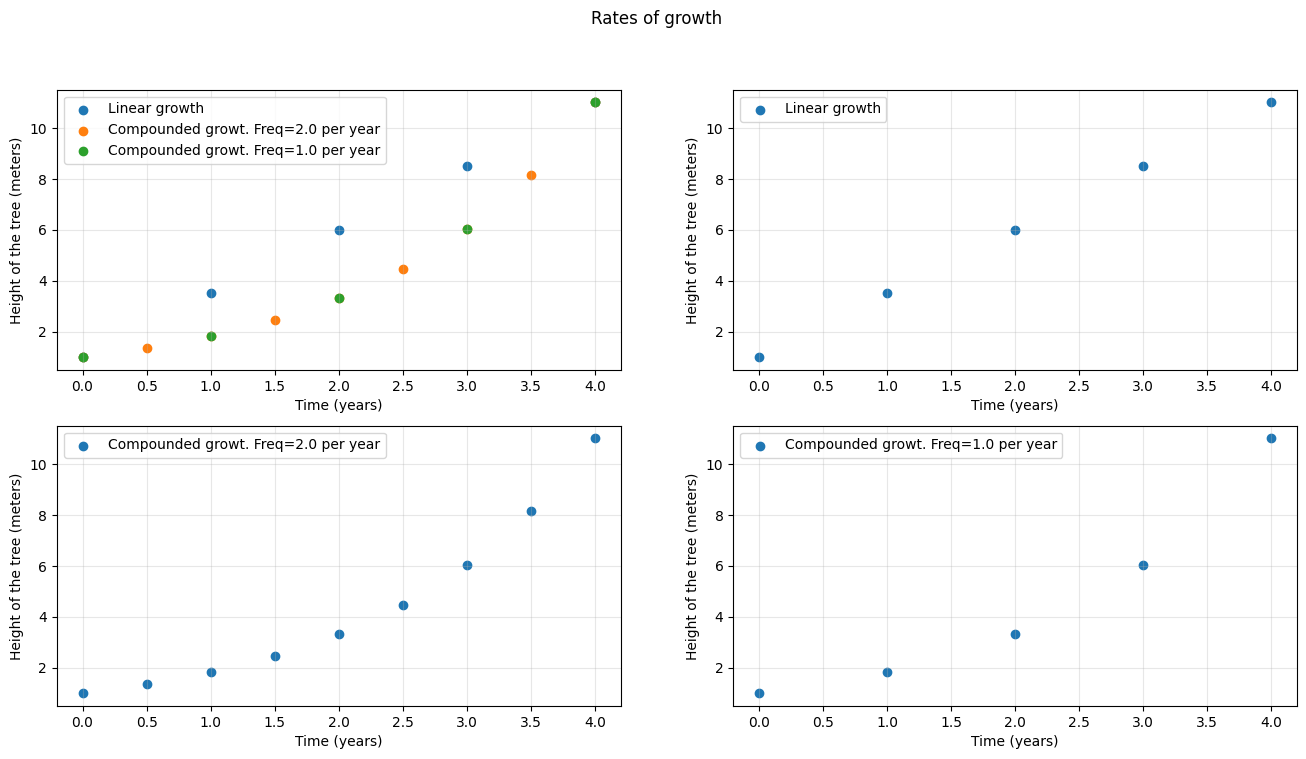

In [50]:
# Growth rates demo
import numpy as np
import matplotlib.pyplot as plt

# Inputs
IV = 1  # m. IV = Initial Value
PV = 11 # m. PV = Present Value
IY = 0  # year. IY = Initial year
PY = 4  # year. PY = Present year

# Derived values
no_of_years = PY-IY

## Linear growth assumption
t1 = np.linspace(IY,PY,no_of_years+1)  # time instances. unit = year
lin_rate = (PV-IV)/no_of_years
h1 = lin_rate*t1+IV   # height of tree

## Compounded rates of growth
plot_data_list = []
for periods_per_year in (1,2):
    no_of_periods = no_of_years*periods_per_year
    rate = (PV/IV)**(1/no_of_periods) - 1
    t = np.linspace(IY,PY,no_of_periods+1)
    h = IV*(1+rate)**(t*periods_per_year)
    plot_data = np.row_stack((t,h))
    plot_data_list.append(plot_data)
    
## Visualization 
fig,ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].scatter(t1,h1, label="Linear growth")
ax[0,1].scatter(t1,h1, label="Linear growth")

for lc,plot_data in enumerate(reversed(plot_data_list)):
    ax[0,0].scatter(plot_data[0], plot_data[1], label="Compounded growth. Freq={} per year".format((plot_data.shape[1]-1)/no_of_years))
    ax[1,lc].scatter(plot_data[0], plot_data[1], label="Compounded growth. Freq={} per year".format((plot_data.shape[1]-1)/no_of_years))

for rn in (0,1):
    for cn in (0,1):
        ax[rn,cn].set_xlabel("Time (years)")
        ax[rn,cn].set_ylabel("Height of the tree (meters)")
        ax[rn,cn].legend()
        ax[rn,cn].grid(alpha=0.3) 

fig.suptitle("Rates of growth")

You can see that the semiannual compounded growth assumption results in the heights at yearly intervals exactly match that of the heights at those points in the annual compounding assumption. This is expected as that is how the maths for compounding works. So the difference between these two assumptions is only that, in the annual compounded growth assumption, we do not assume anything about the growth pattern of the tree in between yearly points of observation or prediction. However if someone were to press us on extending our assumption and predicting the height of the tree at semiannual intervals, we would use $ IV (1+r_1)^{0.5} $ for 0.5th year, $ IV (1+r_1)^{1.5} $ for the 1.5th year and so on, where $ r_1 $ is the annual rate of growth we assumed. The only difference between this and using the six monthly rate is the unit of the exponent: If we want to use the annual compounding rate of $r_1$ to predict the tree's growth at any point in time, we need to use $ IV (1+r_1)^{t\ (years)}$, but if we want to use semiannual compounding rate of $r_2$, then we should use $ IV(1+r_2)^{t\ (six\ months)} $. For instance, if want to to know what the tree height would have been six months ago, we should either use $1\ (m)\times(1+r_1)^{3.5}$ or $1\ (m)\times(1+r_2)^{7}$. 

## Continuous Compounding
What if we want to assume that the compounding happened continuously? What would be that rate? One way to think about it is that this continuously compounding signal, when plotted against time as we have done above, it should look like a continuous, smooth, line that connects the dots of the compounded growth signals (both with a continuous compounding frequency of 1 year and six months). 

Let us normalize this signal by its initial value, as shown below, and get another signal which would make the maths easier
$$
a(t) = \dfrac{h(t)}{IV}
$$

Basically, $a(t)$ would then becomes the pure growth signal $(1+r)^t$. The signal $a(t)$ is a continuously compounding signal. For a small change in time, $a(t)$ changes as:
$$
a(t+dt) = a(t)\times(1+r)^{dt}
$$

Since $r$ is expected to be small, we can use the binomial approximation theorem and get,
$$
\begin{align*}
a(t+dt) &= a(t)\times(1+rdt) \\
a(t+dt) &= a(t)+r\times a(t)dt 
\end{align*}
$$

Therefore, we can find the derivative of $a(t)$ as, 
$$
\begin{align*}
\dfrac{da(t)}{dt} &= \dfrac{a(t+dt) - a(t)}{dt} \\
\dfrac{da(t)}{dt} &= \dfrac{a(t)+r\times a(t)dt  - a(t)}{dt} \\
\dfrac{da(t)}{dt} &= r\times a(t)
\end{align*}
$$ 

A solution to $a(t)$ would then be:
$$
a(t) = e^{rt}
$$

Note that, throughout the derivation, we are assuming some unit for $t$. $t$ could be years, or days, or some other time unit. As long as we maintain the same unit in all our maths, we are OK.

We can find $r$ if we know the height of tree at any two points in time. Again, the points in time must follow the same unit as we have used in the derivation. Let us say $t$ is in years. Let us say the two points in time are $0$ years and $T$ years, and let us call the corresponding height values are $IV$ and $PV$. Then we have,

$$
\begin{align*}
h(0) &= IV*a(0) = IV \\
h(T) &= IV*a(T) = PV \\
IV\times e^{Tr} &= PV \\
e^{Tr} &= PV/IV \\
Tr &= ln(PV/IV) \\
r &= \dfrac{ln(PV/IV)}{T}
\end{align*}
$$

Let us show how continuous compounding indeed interpolates the signals of other compounding frequencies using a script

Text(0.5, 0.98, 'Continuous compounding as interpolation of periodic compounding')

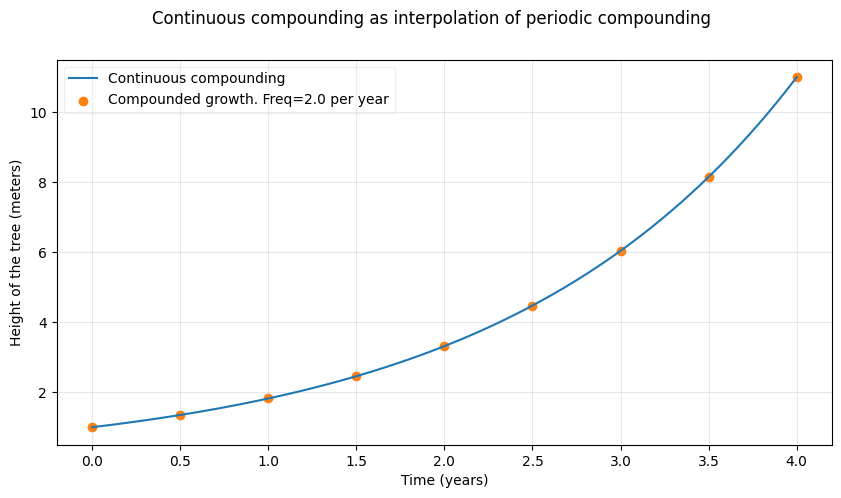

In [56]:
## Demonstrating continuous compounding
periods_per_year = 1000 # Choose any large number
no_of_periods = no_of_years*periods_per_year
r = np.log(PV/IV)/no_of_years
t = np.linspace(IY,PY,no_of_periods+1)
h = IV*np.exp(r*t)

## Visualization 
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(t,h, label="Continuous compounding", color="tab:blue")

plot_data = plot_data_list[-1]
ax.scatter(plot_data[0], plot_data[1], label="Compounded growth. Freq={} per year".format((plot_data.shape[1]-1)/no_of_years), color="tab:orange")
ax.set_xlabel("Time (years)")
ax.set_ylabel("Height of the tree (meters)")
ax.legend(fancybox=True, framealpha=0.3)
ax.grid(alpha=0.3)

fig.suptitle("Continuous compounding as interpolation of periodic compounding")


### APR 
Annual Percentage Rate is a way of standardized way of conveying interest rates. When an APR is given on, say, a loan, one can calculate the loan balance as:

$$
Loan\ Balance = P*\left(1 + \frac{APR}{CF} \right)^{CF\times T}
$$

where $CF$ is the compounding frequency (times/year), and $T$, time in units of years. For example, if we borrow a mortgage loan for \\$100,000 at a rate of 5% APR and its compounding frequency is monthly, then, at the end of 3 months, the balance we owe to the bank would be

$$
\begin{align*}
Loan\ Balance &= \$100,000*\left( 1 + \frac{5}{12} \right)^{12\times 0.25\ (year)} \\
              &= \$100,000*\left( 1 + \frac{5}{12} \right)^{3\ (months)}

\end{align*}
$$

Here, APR is divided by 12 because there are 12 months in a year. If the compounding frequency is daily, then, assuming there are 91 days in 3 months, we would have:

$$
Loan\ Balance = \$100,000*\left( 1 + \frac{5}{365} \right)^{91}
$$

Whenever someone bluntly mentions "rate", it is most likely to be an APR. The compounding frequency is assumed implicitly based on the context. In the U.S., bonds compound semi-annually, most mortgage loans compound monthly, whereas most savings account balances compound daily. It is best to read the fine print and identify the compounding frequency rather than assume any



### EAR 
Effective Annual Rate gives as the annual rate of return on a debt instrument. It can be calculated from APR as:

$$
EAR = \left( 1 + \frac{APR}{CF} \right)^{CF} - 1
$$

For example, if the compounding is monthly, then $ EAR = (1 + APR/12)^{12} - 1 $, and if it is daily, then $EAR = (1 + APR/365)^{365} - 1 $ and so on. When continuous compounding is used, 

$$
EAR = \lim_{CF \to \infty} \left( 1 + \frac{APR}{CF} \right)^{CF} - 1\ =\ e^{APR} - 1
$$

One thing to note about APRs is that, even if someone makes a mistake in the compounding frequency, it may not distort the balance amount all that much as long as the APR is small (say less than 10%). For example, when the APR is 10%, if the compounding frequency is daily, then the overall return (if one had invested in that debt instrument) in 1 year would be:
$$
EAR = \left( 1 + \frac{0.1}{365} \right)^{365} = 10.51\%
$$

But if someone made the mistake of assuming that the compounding was happening monthly, then he will calculate
$$
EAR = \left( 1 + \frac{0.1}{12} \right)^{12} = 10.47\%
$$

The wrong return is only 4 basis points away from the correct one. The following script demonstrates, for a few example APRs, how EAR values change with compounding frequencies.

In [99]:
## EAR vs. Compounding frequency
APRs = np.array([0.01, 0.05, 0.1, 0.2])
CFs = np.array([1, 2, 12, 365])

## Calculate the continuous compounding EAR
ear_cc = np.exp(APRs)-1

## Calculate EAR for all other compounding frequencies
earbps = np.zeros((APRs.size, CFs.size))
ears = np.zeros((APRs.size, CFs.size))
for j,CF in enumerate(CFs):
   ears[:,j] = (1+APRs/CF)**CF-1
   earbps[:,j] = np.round(10000 * ((1+APRs/CF)**CF - 1 - ear_cc.T))

print(earbps)

[[  -1.   -0.   -0.   -0.]
 [ -13.   -6.   -1.   -0.]
 [ -52.  -27.   -5.   -0.]
 [-214. -114.  -20.   -1.]]



### YTM
Yield to maturity is the annual compounding rate that will explain the price of a bond, a.k.a. the present value (PV) of the bond. For example, if a coupon bond pays \\$C every year for M years and, on the M*th* year pays a FV of 

$$
PV = \frac{C}{1+YTM} + \frac{C}{(1+YTM)^2} + \ldots + \frac{C}{(1+YTM)^M} + \frac{FV}{(1+YTM)^M}  
$$

It is very common for bonds to pay coupons on a semi-annual basis. In this case, YTM is calculated like an APR. For ex., a bond in the U.S. that has a coupon rate of 4% and an FV of \\$1000 and a maturity of 5 years pays \\$20 every six months. In this case, YTM is calculated based on:

$$
PV = \frac{C/2}{1+\frac{YTM}{2}} + \frac{C/2}{\left(1+\frac{YTM}{2}\right)^2} + \ldots + \frac{C/2}{\left(1+\frac{YTM}{2}\right)^{2M}} + \frac{FV}{\left(1+\frac{YTM}{2}\right)^{2M}}  
$$

where, C = \\$40. Calculating YTM from the above formulae requires finding the roots of a M*th* or 2M*th* order polynomial. Normally numerical methods are used. But if one wants to use a calculator, one can use second order approximation based solution as given below:

$$
YTM \approx \dfrac{C + \dfrac{FV-PV}{M}}{\dfrac{FV+PV}{2}}
$$

This is for the case of yearly coupon payments. If it is semi-yearly, the formula is the same because,

\begin{align}
\dfrac{YTM}{2} &\approx \dfrac{\dfrac{C}{2} + \dfrac{FV-PV}{2M}}{\dfrac{FV+PV}{2}} \\
\\
YTM &\approx \dfrac{C + \dfrac{FV-PV}{M}}{\dfrac{FV+PV}{2}}
\end{align}

The approximate YTM formula can be used to obtain a seed for the numerical method used to calculate a more accurate YTM.

### Coupon rate
Bond coupon rates are used in the same way as YTM. So 10Y treasuries typically pay semi-annually and are specified to have a cupon rate of 3.5%. It just means that it will pay 17.5 dollars once every siz months. 

### CAGR
Compound Annual Growth Rate is, like YTM, a derived figure. It is used to make sense of a growth that wasn't predetermined. Imagine you invested $x in a stock and it grew to \\$y dollars after some years. If you want to compare this investment to the similar investment in a savings deposit, one of the choices is to come with an imagined compound interest rate on the stock investment and compare it to the savings interest rate. In fact, interest rates are the conventional way of comparing two investments. So we retroactively calculate a compounding interest rate (compounding annually) on the stock investment, which is the CAGR:

$$
CAGR = (y/x)^{1/T} - 1
$$

where, $T$ is the number of years it took for $x to grow into \\$y. 

CAGR is also used as a proxy for anything whose growth rate over the years isn't constant. For instance, the yearly revenue growth rate of a company or the yearly growth rate of smart phone market changes from one year to the next. to make sense of their growth, hence, it is a good idea to come up with a CAGR on the figures over a 5 year period, 10 year period etc.

### Other rates
**Wealth Ratio** is $(1+r)$ where $r$ is the non-annualized rate of return. It is essentially the ratio of the value of the investment at a given point in time to the original investment. 

**APY** (Annual Percentage Yield) is nothing but EAR. **BEY** (Bond Effective Yield) is APR for bonds that mature in less than a year. It is calculated as:

$$
BEY = \dfrac{FV-PV}{PV} * \dfrac{365}{days}
$$

"days" in the above formula is no. of days till maturity. Example: A three month treasury bill of a face value of \\$100 and PV of \\$95 will give a return of 5% in 3 months. BEY, hence, would be 20% because one year has four 3-months. Thus BEY is an APR. Since bonds are traded after initial issue, maturity at purchase time can be odd figures like 82 days, 35 days etc. This is why BEY formula uses maturity days instead of maturity months as the granularity period. One can calculate EAR from BEY using:

$$
EAR = \left[ 1 + \dfrac{BEY}{\left(\dfrac{365}{days}\right)} \right]^{\left(\dfrac{365}{days}\right)}
$$

### 1. **Duration (Macaulay Duration)**
The **Macaulay Duration** of a bond measures the weighted average time to receive the bond’s cash flows, where the weights are the present values of each cash flow as a proportion of the bond’s price. It is expressed in units of time, typically in years.

The formula for **Macaulay Duration** is:

$$
D = \frac{\sum_{t=1}^{n} t \times \frac{C_t}{(1 + y)^t}}{\sum_{t=1}^{n} \frac{C_t}{(1 + y)^t}}
$$

Where:
- $ D $ is the Macaulay Duration.
- $C_t $ is the cash flow (coupon payment or principal) at time $ t $.
- $y$ is the bond’s yield to maturity (YTM) per period (expressed as a decimal).
- $t$ is the time period (e.g., years).
- $n$ is the number of periods until the bond matures.
- $\frac{C_t}{(1 + y)^t} $ is the present value of each cash flow at time $ t $.

This gives the weighted average time until each cash flow is received, where the weights are the proportion of each cash flow’s present value to the total price.

### 2. **Modified Duration**
The **Modified Duration** is a measure of a bond’s price sensitivity to changes in interest rates. It is derived from the Macaulay Duration and adjusts for the bond's yield. Modified Duration estimates the percentage change in a bond's price for a 1% (or 100 basis points) change in yield.

The formula for **Modified Duration** is:

$$
D_{\text{mod}} = \frac{D}{1 + y}
$$

Where:
- $ D_{\text{mod}} $ is the Modified Duration.
- $ D $ is the Macaulay Duration.
- $ y $ is the bond’s yield to maturity (YTM) per period (expressed as a decimal).

### Interpretation:
- **Macaulay Duration** gives you a measure of how long it takes, on average, to receive the bond’s cash flows.
- **Modified Duration** gives you an estimate of how sensitive the bond’s price is to changes in interest rates. Specifically, it tells you the percentage price change for a 1% change in the yield.

### Example:
- If a bond has a **Modified Duration** of 5, a 1% increase in the yield to maturity will result in an approximately 5% decline in the bond’s price, and a 1% decrease in yield will lead to a 5% increase in the bond’s price.